In [1]:
import torch
import numpy as np
import pandas as pd
import random
import torch.nn.functional as F
from torch import nn

In [2]:
from models import *
from utility import *

# Prva naloga

In [3]:
data = pd.read_csv("okuzeni.csv")
data = data.fillna(0)
data = data / data.max()
data

,braslovče,celje,dobje,dobrna,gornji_grad,kozje,laško,ljubno,luče,mozirje,...,radlje_ob_dravi,ravne_na_koroškem,ribnica_na_pohorju,slovenj_gradec,vuzenica,črna_na_koroškem,hrastnik,litija,trbovlje,zagorje_ob_savi
0,0.072900,0.096673,0.097345,0.143939,0.257642,0.046243,0.057719,0.140845,0.118056,0.147420,...,0.176271,0.078720,0.093023,0.103627,0.107872,0.113793,0.087613,0.079287,0.056893,0.097132
1,0.079239,0.085510,0.044248,0.121212,0.279476,0.043353,0.052851,0.117371,0.125000,0.142506,...,0.176271,0.074394,0.100775,0.099482,0.104956,0.117241,0.104230,0.084204,0.058352,0.092568
2,0.085578,0.084394,0.053097,0.117424,0.262009,0.040462,0.055633,0.075117,0.111111,0.147420,...,0.169492,0.072664,0.093023,0.102591,0.104956,0.106897,0.131420,0.075599,0.073669,0.096480
3,0.080824,0.082384,0.053097,0.102273,0.240175,0.040462,0.054937,0.065728,0.104167,0.130221,...,0.164407,0.067474,0.093023,0.099482,0.102041,0.106897,0.129909,0.079902,0.070022,0.087353
4,0.082409,0.081491,0.061947,0.102273,0.235808,0.040462,0.057719,0.061033,0.090278,0.125307,...,0.169492,0.064014,0.085271,0.097409,0.099125,0.093103,0.134441,0.078058,0.083880,0.103651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.025357,0.030587,0.053097,0.018939,0.030568,0.017341,0.023644,0.009390,0.020833,0.029484,...,0.038983,0.039792,0.031008,0.027979,0.043732,0.017241,0.113293,0.069453,0.036470,0.065841
796,0.025357,0.029917,0.053097,0.018939,0.030568,0.017341,0.023644,0.009390,0.020833,0.029484,...,0.038983,0.040657,0.031008,0.027979,0.037901,0.017241,0.113293,0.065765,0.035740,0.062581
797,0.023772,0.029917,0.053097,0.018939,0.030568,0.017341,0.023644,0.009390,0.020833,0.029484,...,0.032203,0.039792,0.031008,0.027979,0.037901,0.017241,0.113293,0.065765,0.035740,0.061278
798,0.026941,0.028801,0.061947,0.026515,0.034934,0.017341,0.027121,0.009390,0.020833,0.024570,...,0.030508,0.041522,0.023256,0.025389,0.037901,0.017241,0.119335,0.071911,0.040846,0.065841


RNN celica

In [4]:
obcine = ["ljubljana", "maribor", "kranj", "koper", "celje", "novo_mesto", "velenje", "nova_gorica", "krško", "ptuj", "murska_sobota", "slovenj_gradec"]
test_data = data[obcine]
data = data.drop(obcine, axis=1)

In [5]:
data

,braslovče,dobje,dobrna,gornji_grad,kozje,laško,ljubno,luče,mozirje,nazarje,...,prevalje,radlje_ob_dravi,ravne_na_koroškem,ribnica_na_pohorju,vuzenica,črna_na_koroškem,hrastnik,litija,trbovlje,zagorje_ob_savi
0,0.072900,0.097345,0.143939,0.257642,0.046243,0.057719,0.140845,0.118056,0.147420,0.082969,...,0.094771,0.176271,0.078720,0.093023,0.107872,0.113793,0.087613,0.079287,0.056893,0.097132
1,0.079239,0.044248,0.121212,0.279476,0.043353,0.052851,0.117371,0.125000,0.142506,0.091703,...,0.091503,0.176271,0.074394,0.100775,0.104956,0.117241,0.104230,0.084204,0.058352,0.092568
2,0.085578,0.053097,0.117424,0.262009,0.040462,0.055633,0.075117,0.111111,0.147420,0.091703,...,0.083333,0.169492,0.072664,0.093023,0.104956,0.106897,0.131420,0.075599,0.073669,0.096480
3,0.080824,0.053097,0.102273,0.240175,0.040462,0.054937,0.065728,0.104167,0.130221,0.096070,...,0.078431,0.164407,0.067474,0.093023,0.102041,0.106897,0.129909,0.079902,0.070022,0.087353
4,0.082409,0.061947,0.102273,0.235808,0.040462,0.057719,0.061033,0.090278,0.125307,0.109170,...,0.083333,0.169492,0.064014,0.085271,0.099125,0.093103,0.134441,0.078058,0.083880,0.103651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.025357,0.053097,0.018939,0.030568,0.017341,0.023644,0.009390,0.020833,0.029484,0.052402,...,0.032680,0.038983,0.039792,0.031008,0.043732,0.017241,0.113293,0.069453,0.036470,0.065841
796,0.025357,0.053097,0.018939,0.030568,0.017341,0.023644,0.009390,0.020833,0.029484,0.048035,...,0.034314,0.038983,0.040657,0.031008,0.037901,0.017241,0.113293,0.065765,0.035740,0.062581
797,0.023772,0.053097,0.018939,0.030568,0.017341,0.023644,0.009390,0.020833,0.029484,0.048035,...,0.034314,0.032203,0.039792,0.031008,0.037901,0.017241,0.113293,0.065765,0.035740,0.061278
798,0.026941,0.061947,0.026515,0.034934,0.017341,0.027121,0.009390,0.020833,0.024570,0.048035,...,0.029412,0.030508,0.041522,0.023256,0.037901,0.017241,0.119335,0.071911,0.040846,0.065841


In [6]:
X = torch.tensor(data.to_numpy()).float()
cities_count = int(X.shape[1])
datapoints = int(X.shape[0])

Xtest = torch.tensor(test_data.to_numpy()).float()
cities_count_test = int(Xtest.shape[1])

def rangen(n, layers=5):
    return range(800-layers-n+1)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X[:, 80])

In [27]:
n = 5
batch_size = 16
dset = create_dataset(X, batch_size, n)
modelrnn = recurrent(1, 1, 20, n)
criterion = torch.nn.L1Loss()
optimiser = torch.optim.AdamW(modelrnn.parameters(), lr=0.003, weight_decay=0.005)
epochs = 3

modelrnn = train_recurrent(modelrnn, optimiser, criterion, dset, epochs)

Epoch  0
 Loss: 0.0444, est rea [0.1 0.0]
 Loss: 0.0614, est rea [0.1 0.16640253365039825]
 Loss: 0.0227, est rea [0.0 0.047959912568330765]
 Loss: 0.0185, est rea [0.1 0.14923891425132751]
 Loss: 0.0147, est rea [0.1 0.08702845871448517]
 Loss: 0.0035, est rea [-0.0 0.0]
 Loss: 0.0108, est rea [0.0 0.025641025975346565]
 Loss: 0.0112, est rea [0.1 0.07619047909975052]
 Loss: 0.0189, est rea [0.1 0.05113636329770088]
 Loss: 0.0133, est rea [0.1 0.11538461595773697]
 Loss: 0.0156, est rea [0.1 0.07765451818704605]
 Loss: 0.0218, est rea [0.0 0.0]
 Loss: 0.0185, est rea [-0.0 0.0]
 Loss: 0.0134, est rea [0.1 0.04466501250863075]
 Loss: 0.0143, est rea [0.0 0.03639973700046539]
 Loss: 0.0072, est rea [0.1 0.0517241396009922]
 Loss: 0.0213, est rea [0.1 0.04968944191932678]
 Loss: 0.0172, est rea [0.0 0.06814579665660858]
 Loss: 0.0101, est rea [0.0 0.01034482754766941]
 Loss: 0.0062, est rea [-0.0 0.0]
 Loss: 0.0519, est rea [0.2 0.14827586710453033]
 Loss: 0.0101, est rea [0.0 0.03105590

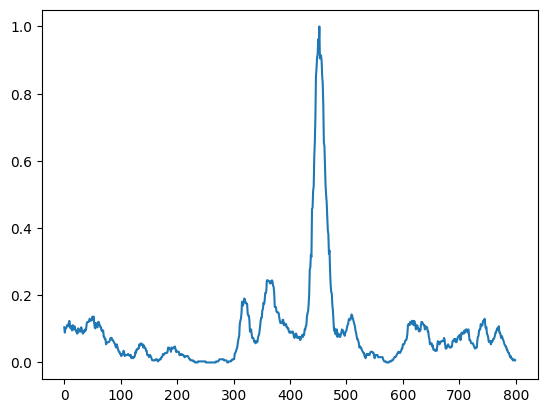

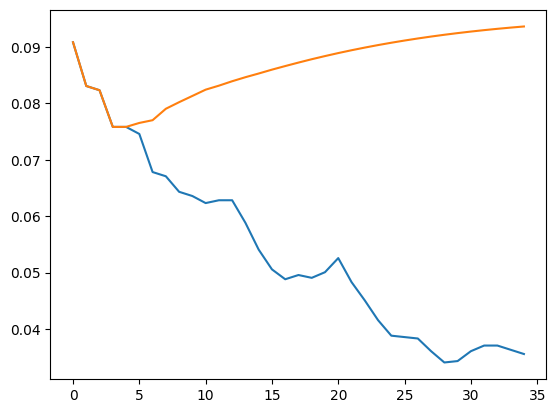

In [38]:
modelrnn.eval()
start = 85
n = 30
mine = predict_n(Xtest, 5, start, modelrnn, n)
plt.plot(Xtest[start:start+n+modelrnn.layers, 5])
plt.plot(mine)

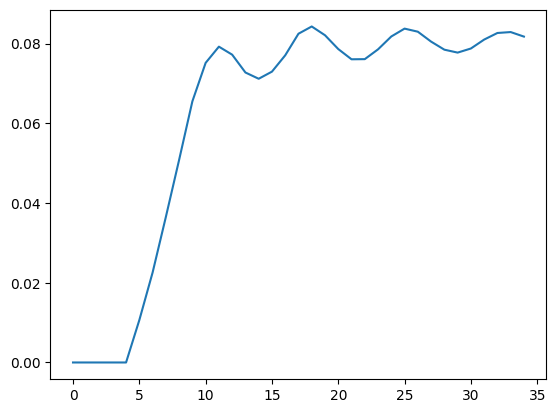

In [29]:
plt.plot(compute_errors(Xtest, modelrnn, rangen(n), n))

In [40]:
n = 5
batch_size = 16
#device = torch.device("cuda")
# (self, input, output, hidden, layers):
dset = create_dataset(X, batch_size, n)
modellstm = lstm(1, 1, 20, n)
criterion = torch.nn.L1Loss() #MSELoss()
optimiser = torch.optim.AdamW(modellstm.parameters(), lr=0.002, weight_decay=0.005)

modellstm =train_recurrent(modellstm, optimiser, criterion, dset, epochs)

Epoch  0
 Loss: 0.0101, est rea [0.1 0.07511581480503082]
 Loss: 0.0037, est rea [0.0 0.0]
 Loss: 0.0328, est rea [0.1 0.11428571492433548]
 Loss: 0.0700, est rea [0.1 0.16101695597171783]
 Loss: 0.0106, est rea [0.1 0.05128205195069313]
 Loss: 0.0204, est rea [0.1 0.01904761977493763]
 Loss: 0.0254, est rea [0.1 0.14953270554542542]
 Loss: 0.0189, est rea [0.1 0.050713155418634415]
 Loss: 0.0204, est rea [0.1 0.059563204646110535]
 Loss: 0.0325, est rea [0.0 0.09855769574642181]
 Loss: 0.0130, est rea [0.1 0.062068965286016464]
 Loss: 0.0144, est rea [0.2 0.15909090638160706]
 Loss: 0.0162, est rea [0.0 0.0]
 Loss: 0.0127, est rea [0.1 0.043478261679410934]
 Loss: 0.0282, est rea [0.1 0.14827586710453033]
 Loss: 0.0086, est rea [0.0 0.0]
 Loss: 0.0357, est rea [0.0 0.0]
 Loss: 0.0141, est rea [0.0 0.013793103396892548]
 Loss: 0.0239, est rea [0.1 0.1410459578037262]
 Loss: 0.4141, est rea [1.0 0.47663551568984985]
 Loss: 0.0120, est rea [0.0 0.0317460335791111]
 Loss: 0.1435, est rea 

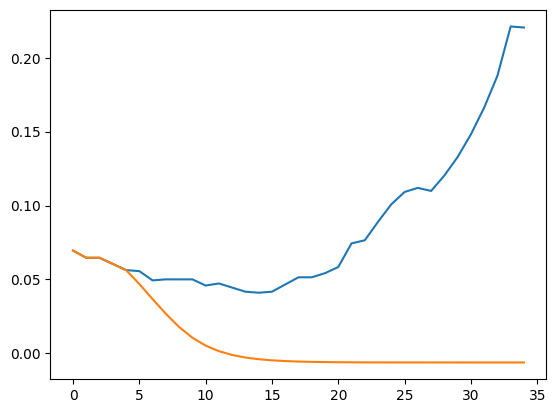

In [41]:
modellstm.eval()
start = 400
n = 30
mine = predict_n(X, 5, start, modellstm, n)
plt.plot(X[start:start+n+modellstm.layers, 5])
plt.plot(mine)

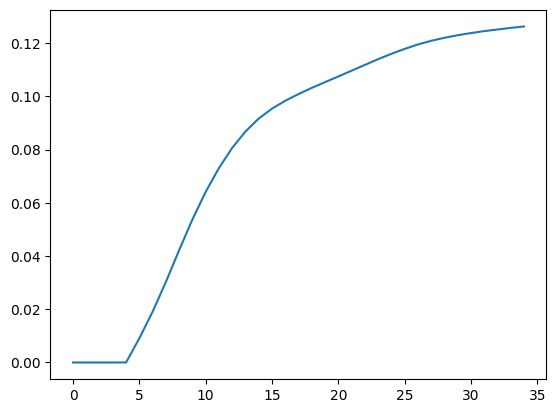

In [42]:

plt.plot(compute_errors(Xtest, modellstm, rangen(n), n))

In [39]:
n = 10
batch_size = 16
#device = torch.device("cuda")
# (self, input, output, hidden, layers):
dset = create_dataset(X, batch_size, n)
modeldeep = deep_linear(1,1,20, n)
criterion = torch.nn.L1Loss() #MSELoss() 
optimiser = torch.optim.AdamW(modeldeep.parameters(), lr=0.002, weight_decay=0.005)

epochs = 3
modeldeep = train_deep(modeldeep, optimiser, criterion, dset, epochs)

Epoch  0
 Loss: 0.0327, est rea [0.1 0.18465909361839294]
 Loss: 0.0235, est rea [0.1 0.13636364042758942]
 Loss: 0.0374, est rea [0.0 0.02484472095966339]
 Loss: 0.0171, est rea [0.1 0.0762711837887764]
 Loss: 0.0174, est rea [0.1 0.059659089893102646]
 Loss: 0.0147, est rea [0.1 0.08050847798585892]
 Loss: 0.0120, est rea [0.1 0.06779661029577255]
 Loss: 0.0326, est rea [0.1 0.0476190485060215]
 Loss: 0.0346, est rea [0.0 0.03726708143949509]
 Loss: 0.0271, est rea [0.1 0.13084112107753754]
 Loss: 0.0100, est rea [0.0 0.02484472095966339]
 Loss: 0.0240, est rea [0.1 0.10593220591545105]
 Loss: 0.0082, est rea [0.0 0.04126984253525734]
 Loss: 0.0170, est rea [0.1 0.07131537050008774]
 Loss: 0.0110, est rea [0.1 0.053977273404598236]
 Loss: 0.0184, est rea [0.1 0.1675017923116684]
 Loss: 0.0102, est rea [0.0 0.012711863964796066]
 Loss: 0.0115, est rea [0.0 0.0015847861068323255]
 Loss: 0.0179, est rea [0.1 0.08041032403707504]
 Loss: 0.0271, est rea [0.1 0.12820513546466827]
 Loss: 0.

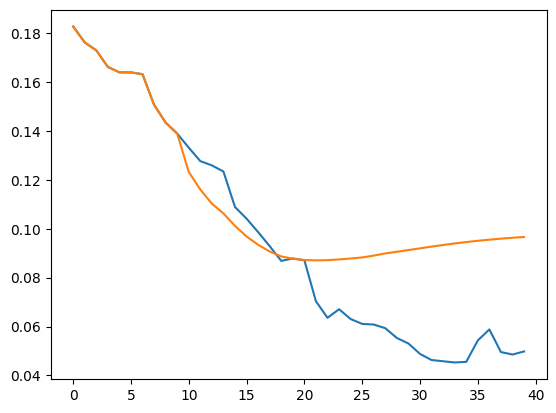

In [26]:
modeldeep.eval()
start = 700
n = 30
mine = predict_n_deep(Xtest, 5, start, modeldeep, n)
plt.plot(Xtest[start:start+n+modeldeep.layers, 5])
plt.plot(mine)

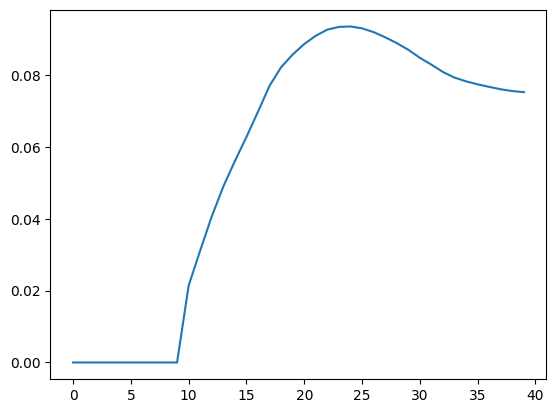

In [16]:

plt.plot(compute_errors_deep(Xtest, modeldeep, rangen(n, 10), n))

modeli za N=10

In [17]:
n = 10
batch_size = 16
dset = create_dataset(X, batch_size, n)
modelrnn = recurrent(1, 1, 20, n)
criterion = torch.nn.L1Loss()
optimiser = torch.optim.AdamW(modelrnn.parameters(), lr=0.003, weight_decay=0.005)
epochs = 3

modelrnn = train_recurrent(modelrnn, optimiser, criterion, dset, epochs)

12

In [ ]:
modelrnn.eval()
start = 85
n = 30
mine = predict_n(Xtest, 5, start, modelrnn, n)
plt.plot(Xtest[start:start+n+modelrnn.layers, 5])
plt.plot(mine)

In [ ]:
plt.plot(compute_errors(Xtest, modelrnn, rangen(n), n))